In [1]:
#!pip install pytrends

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import matplotlib.style as style

In [4]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

In [5]:
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Interest Over Time

In [6]:
# Get the keyword set to load data

In [7]:
pytrend.build_payload(kw_list=['make money online'])

In [8]:
# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
#print(related_queries_dict)

In [9]:
related_queries_dict

{'make money online': {'top':                            query  value
  0                            how    100
  1          how make money online     99
  2                         how to     93
  3       how to make online money     91
  4              how to make money     90
  5      online ways to make money     18
  6             ways to make money     17
  7          gta online make money     15
  8                     gta online     15
  9                    online jobs     12
  10        make free money online     11
  11                    free money     11
  12        make money fast online     11
  13               make money fast     11
  14              get money online     10
  15      way to make money online     10
  16       make money gta 5 online      9
  17             earn money online      9
  18  how to make money gta online      8
  19       how i make money online      8
  20   make money from home online      8
  21          make money from home      8
  22  

In [10]:
## GET THE TIME DEPENDENT DATA FOR THE ONLINE MONEY MAKING

In [27]:
keywords = ['online ways to make money','online jobs','make money online free',
                              'way to make money online','make fast money online','earn money online',
            'make money from home online','apply jobs', 'find jobs near me']

In [28]:
keyword = 'make money online'
pytrend.build_payload(kw_list=[keyword])
time_df = pytrend.interest_over_time()[keyword].reset_index().query('date>@pd.datetime(2019,1,1)')

In [29]:
for keyword in keywords:
    pytrend.build_payload(kw_list=[keyword])
    new_results = pytrend.interest_over_time()[keyword].reset_index().query('date>@pd.datetime(2020,1,1)')
    time_df = time_df.merge(new_results, on='date')

In [30]:
time_df.head()

,date,make money online,online ways to make money,online jobs,make money online free,way to make money online,make fast money online,earn money online,make money from home online,apply jobs,find jobs near me
0,2020-01-05,67,0,91,0,0,0,0,43,27,46
1,2020-01-12,32,25,96,0,28,0,41,0,65,0
2,2020-01-19,67,26,67,35,29,39,21,86,55,30
3,2020-01-26,50,25,48,33,28,0,0,41,59,29
4,2020-02-02,64,25,48,0,28,0,0,41,65,58


In [31]:
keywords.append('make money online')

In [32]:
#time_df_avg= time_df.set_index('date').mean(axis=1).reset_index().rename(columns = {0:'Make Money Online'})
#time_df_avg.head()

In [33]:
#fig, ax = plt.subplots()
#time_df.plot(ax=ax, x='date',y='online jobs')

In [34]:
# Get the search for physical jobs
#keyword = 'find jobs near me'
#pytrend.build_payload(kw_list=[keyword])
#test_df = pytrend.interest_over_time()

## LOAD CORONA DATA FROM 
https://covidtracking.com/data/download

In [35]:
corona_count = pd.read_csv('national-history.csv')
corona_count['date']= pd.to_datetime(corona_count.date)
corona_count.positiveIncrease = corona_count.positiveIncrease/1e3

In [36]:
sns.set_style("dark")

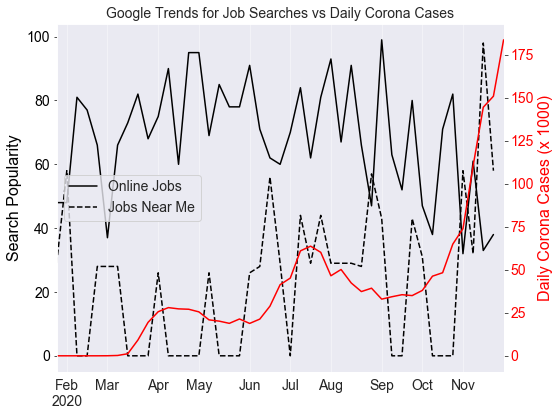

In [38]:

fig, ax = plt.subplots(figsize=(8,6))
color = 'black'

ax.set_ylabel('Search Popularity', color=color)
time_df.plot(ax=ax, x='date',y='online jobs',color=color)
ax.set_xlabel('Date')
ax.tick_params(axis='y', labelcolor=color)

time_df.plot(ax=ax, x='date',y='find jobs near me',color=color, linestyle='--')
plt.xlabel('')
plt.legend(['Online Jobs','Jobs Near Me'])

color='red'
ax2 = ax.twinx()
ax2.set_ylabel('Daily Corona Cases (x 1000)', color=color)  # we already handled the x-label with ax1
corona_count.sort_values(by='date').plot(ax=ax2, x='date',y='positiveIncrease',color=color,legend=False)
ax2.tick_params(axis='y', labelcolor=color)

ax.grid(which='major',axis='x',alpha=0.5)
#ax.grid(which='major',axis='x',alpha=0.5)


plt.title('Google Trends for Job Searches vs Daily Corona Cases')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [ ]:
## TEST BY REGION

In [65]:
style.use('fivethirtyeight')

In [156]:
def get_stats_by_state(title, subtitle, keyword='online jobs', rolling_wndw=4, 
                       states=['ND','CA','MA'], brand_y_pos = 20,
                      y_title=135,
                      y_subtitle=100):
    
    fig, ax = plt.subplots(figsize=(8,4))
    for state in states: 

        pytrend.build_payload(kw_list=[keyword],geo='US-'+state)
        interest_over_time = pytrend.interest_over_time()
        interest_over_time[keyword] = interest_over_time[keyword].rolling(rolling_wndw).mean()
        interest_over_time.reset_index().query('date>@pd.datetime(2020,1,1)').plot(ax=ax, x='date',y=keyword)

    ax.xaxis.label.set_visible(False)
    plt.legend(states)
    #plt.title(title)
    ax.grid(which='major',axis='x')
    #plt.xlabel('')
    
    # The signature bar
    ax.text(x = pd.datetime(2020,10,1), y = brand_y_pos,
    s = '@s1nancan',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
    
    
    # Adding a title and a subtitle
    ax.text(x = pd.datetime(2019,12,20) , y = y_title, s = title, fontsize = 26, weight = 'bold', alpha = .75)
    ax.text(x = pd.datetime(2019,12,20), y = y_subtitle, s = subtitle, fontsize = 19, alpha = .85)


    plt.show()

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


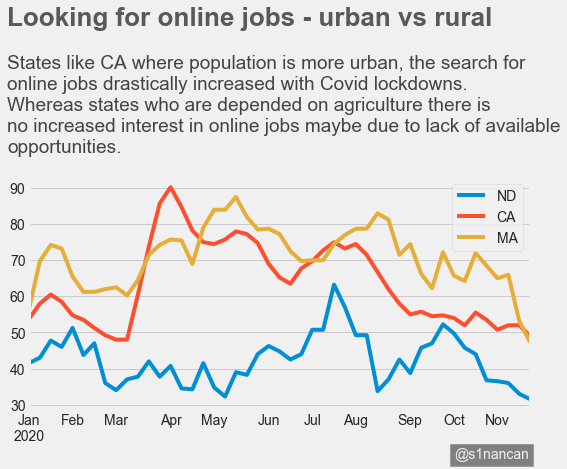

In [157]:
subtit= 'States like CA where population is more urban, \
the search for \nonline jobs drastically increased with Covid lockdowns.\nWhereas states who are depended on agriculture there is\nno increased interest in online jobs maybe due to lack of available\nopportunities.'
get_stats_by_state(title='Looking for online jobs - urban vs rural',subtitle=subtit,brand_y_pos=15)

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


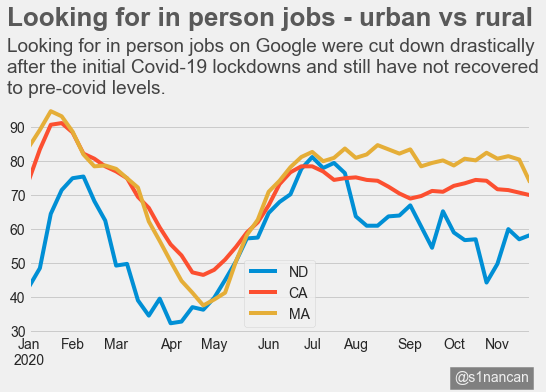

In [159]:
subtitle = 'Looking for in person jobs on Google were cut down drastically\nafter the initial Covid-19 lockdowns \
and still have not recovered\nto pre-covid levels.'
get_stats_by_state(keyword='jobs near me', title='Looking for in person jobs - urban vs rural', subtitle=subtitle,
                  y_title=120,brand_y_pos=15)